# CHANGES TO MAKE TO CODE:

Look at getObjects code, specifically the galaxy method. One of the ID flags is wrong. Within the calibration, make sure to use the galaxy magnitude for the galaxy objects when reading those in.

Shift the isochrone cut to the end for every time it's applied. It takes far longer than other cut, so we want to do that at the end so it's being done on the fewest objects as possible.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
import astropy.io.fits as fits
from astropy.table import Table
import healpy as hp
import healsparse as hsp
import skyproj
from os import listdir
import astropy.units as u
from astropy.coordinates import SkyCoord
import Config
import IsochroneConfig as isoConfig
from CropSurveyProperties import *
from GetObjects import *
from TrainAndFullMap import *

Reading fracdet map /hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/fracdet/y3a2_griz_o.4096_t.32768_coverfoot_EQU.fits.gz ...
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = EXPLICIT
Ordering converted to RING


## Parameters

In [2]:
res = isoConfig.res
perCovered = isoConfig.perCovered
numMagBins = isoConfig.numMagBins
sigma = isoConfig.sigma
perMap = isoConfig.perMap
perVar = isoConfig.perVar
numBins = isoConfig.numBins
Class_Cutoff = isoConfig.classCutoff
goldCols = isoConfig.goldCols
qualityCuts = isoConfig.qualityCuts

## Isochrone Selector

In [3]:
iso = isoConfig.iso

## Files

In [4]:
matBalrFile = isoConfig.matBalrFile
detBalrFile = isoConfig.detBalrFile
matBalrStarFile = isoConfig.matBalrStarFile
detBalrStarFile = isoConfig.detBalrStarFile

galaFile = isoConfig.galaFile
matStarFile = isoConfig.matStarFile
detStarFile = isoConfig.detStarFile

deepFiles = isoConfig.deepFiles

origCondFiles = isoConfig.origCondFiles
stelFile = isoConfig.stelFile
pixFile = isoConfig.pixFile
condFiles = isoConfig.condFiles

galaExtrFiles = isoConfig.galaExtrFiles
galaTrainFiles = isoConfig.galaTrainFiles
galaProbFiles = isoConfig.galaProbFiles

starExtrFiles = isoConfig.starExtrFiles
starTrainFiles = isoConfig.starTrainFiles
starProbFiles = isoConfig.starProbFiles
    
starDetExtrFiles = isoConfig.starDetExtrFiles
starDetTrainFiles = isoConfig.starDetTrainFiles
starDetProbFiles = isoConfig.starDetProbFiles

obsStarFiles = isoConfig.obsStarFiles
obsGalaFiles = isoConfig.obsGalaFiles

goldObjectsDir = isoConfig.goldObjectsDir
goldObjectsFiles = isoConfig.goldObjectsFiles

starPosFiles = isoConfig.starPosFiles
galaPosFiles = isoConfig.galaPosFiles
calibrationFile = isoConfig.calibrationFile

## Getting Synthetic Objects

In [5]:
# getMatStars(iso, matBalrStarFile, detBalrStarFile, matStarFile, qualityCuts)

In [6]:
matStarRMAG = np.sort(fitsio.read(matStarFile)['RMAG'])

splitMags = np.array_split(matStarRMAG, numMagBins)

magBins = [] # This will define the boundary of bins so that the number of objects is constant.
for i in np.arange(len(splitMags) - 1):
    magBins.append(splitMags[i][-1])
print(magBins)

[19.732971263609105, 21.031829834303775, 22.108306528457593, 23.31211436793671]


In [7]:
# getDetStar(iso, detBalrStarFile, detStarFile, qualityCuts)

In [8]:
# getGalaxies(iso, deepFiles, matBalrFile, detBalrFile, galaFile, qualityCuts)

## Cropping Survey Conditions

In [9]:
# validPixCropData(res, origCondFiles, stelFile, pixFile, condFiles, perCovered)

## Training

In [10]:
# singleCorrectionTrain(matStarFile, condFiles, pixFile, magBins, starTrainFiles, starProbFiles, starExtrFiles, sigma, perMap, perVar, numBins, res, True, False, Class_Cutoff)
for starTrainFile in starTrainFiles:
    print(loadtxt(starTrainFile[0:-5] + '_Ave_Acc.csv', delimiter=','))

0.9964453125
0.9892972930744893
0.9723685751083011
0.914726868639607
0.8162708162708163


In [11]:
# singleCorrectionTrain(detStarFile, condFiles, pixFile, magBins, starDetTrainFiles, starDetProbFiles, starDetExtrFiles, sigma, perMap, perVar, numBins, res, True, True, Class_Cutoff)
for starDetTrainFile in starDetTrainFiles:
    print(loadtxt(starDetTrainFile[0:-5] + '_Ave_Acc.csv', delimiter=','))

0.9945621064682313
0.9907450846590182
0.9829741519630184
0.9719206520067661
0.8441331999428326


In [12]:
# singleCorrectionTrain(galaFile, condFiles, pixFile, magBins, galaTrainFiles, galaProbFiles, galaExtrFiles, sigma, perMap, perVar, numBins, res, False, False, Class_Cutoff)
for galaTrainFile in galaTrainFiles:
    print(loadtxt(galaTrainFile[0:-5] + '_Ave_Acc.csv', delimiter=','))

0.9514083648335568
0.9456448345712356
0.8796780223553199
0.9396580854285822
0.7032612384920871


In [13]:
validPix = fitsio.read(pixFile)['PIXEL']
pixCheck = np.full(12*(res**2), False, dtype = bool)
pixCheck[validPix] = True

In [14]:
# STARPIX = []
# GALAPIX = []

# for i in range(len(magBins) + 1):
    
#     magStarPix = []
#     magGalaPix = []
    
#     for file in goldObjectsFiles:
#         obsData = fitsio.read(goldObjectsDir + file, columns = goldCols)
#         FOREGROUND = obsData[goldCols[0]]
#         BADREGIONS = obsData[goldCols[1]]
#         FOOTPRINT = obsData[goldCols[2]]
#         CLASS = obsData[goldCols[3]]
#         GMAG = obsData[goldCols[4]]
#         RMAG = obsData[goldCols[5]]
#         IMAG = obsData[goldCols[6]]
#         GMAG_GALA = obsData[goldCols[7]]
#         RMAG_GALA = obsData[goldCols[8]]
#         IMAG_GALA = obsData[goldCols[9]]
#         RA = obsData[goldCols[10]]
#         DEC = obsData[goldCols[11]]
#         PIX = hp.ang2pix(res, RA, DEC, lonlat = True, nest = True)
        
#         # General Quality Cuts
#         qualityCut = np.where((FOREGROUND == 0) &
#                               (BADREGIONS < 2) &
#                               (FOOTPRINT == 1) &
#                               (pixCheck[PIX]))[0]
        
#         CLASS = CLASS[qualityCut]
#         GMAG = GMAG[qualityCut]
#         RMAG = RMAG[qualityCut]
#         IMAG = IMAG[qualityCut]
#         GMAG_GALA = GMAG_GALA[qualityCut]
#         RMAG_GALA = RMAG_GALA[qualityCut]
#         IMAG_GALA = IMAG_GALA[qualityCut]
#         PIX = PIX[qualityCut]
        
#         # This defines magnitude cuts in accordance with the magnitude bins.
#         if i == 0:
#             maxRMAG = magBins[i]
#             magCut = np.where(RMAG <= maxRMAG)[0]
#             magCutGala = np.where(RMAG_GALA <= maxRMAG)[0]
#         elif i == len(magBins):
#             minRMAG = magBins[i - 1]
#             magCut = np.where(RMAG > minRMAG)[0]
#             magCutGala = np.where(RMAG_GALA > minRMAG)[0]
#         else:
#             minRMAG = magBins[i - 1]
#             maxRMAG = magBins[i]
#             magCut = np.where((RMAG <= maxRMAG) & (RMAG > minRMAG))[0]
#             magCutGala = np.where((RMAG_GALA <= maxRMAG) & (RMAG_GALA > minRMAG))[0]
        
#         boolMagCut = np.zeros(len(RMAG))
#         boolMagCut[magCut] = 1
        
#         boolMagCutGala = np.zeros(len(RMAG_GALA))
#         boolMagCutGala[magCutGala] = 1
        
#         mag_g_err = np.zeros_like(GMAG)
#         mag_r_err = np.zeros_like(RMAG)
        
#         isoStarCut = iso.cut_separation('g', 'r', GMAG, RMAG, mag_g_err, mag_r_err, radius=0.1)
        
#         isoGalaCut = iso.cut_separation('g', 'r', GMAG_GALA, RMAG_GALA, mag_g_err, mag_r_err, radius=0.1)
        
#         # Star Cut:
        
#         starCut = np.where((CLASS >= 0) & 
#                            (CLASS <= Class_Cutoff) &
#                            (boolMagCut > 0) &
#                            (isoStarCut) &
#                            (RMAG < qualityCuts[0]) &
#                            (IMAG < qualityCuts[1]))[0]
        
#         magStarPix.extend(PIX[starCut])
        
#         # Gala Cut:
        
#         galaCut = np.where((CLASS <=  3) & 
#                            (CLASS >= Class_Cutoff) &
#                            (boolMagCutGala > 0) &
#                            (isoGalaCut) &
#                            (RMAG_GALA < qualityCuts[0]) &
#                            (IMAG_GALA < qualityCuts[1]))[0]
        
#         magGalaPix.extend(PIX[galaCut])
        
#     STARPIX.append(np.array(magStarPix))
#     GALAPIX.append(np.array(magGalaPix))
    
# STARPIX = np.array(STARPIX, dtype = object)
# GALAPIX = np.array(GALAPIX, dtype = object)

In [15]:
# for j in np.arange(len(STARPIX)):

#     starPixRepeats = STARPIX[j]
#     sortInds = starPixRepeats.argsort()
#     starPixRepeats = starPixRepeats[sortInds[::1]]

#     # These are indices that will be looping through the pixStar and starPix arrays in parallel.
#     uniqInd = 0
#     starInd = 0

#     # This will be used to store the number of stars at each pixel.
#     starPix = np.unique(starPixRepeats) # The unique pixels, with no repeats.
#     starDet = np.zeros_like(starPix)

#     while starInd < len(starPixRepeats):
#         if starPix[uniqInd] == starPixRepeats[starInd]: # If the pixels match up in the arrays.
#             starDet[uniqInd] += 1                # Add one for the detection..
#             starInd += 1                         # Add one to the starInd to see if the next index in starPix is also the same.
#             # Since the last index of pixStar and starPix are the same, starInd will increase the last time through the loop,
#             # making this the index that we must restrict in the while loop.
#         else:
#             uniqInd += 1 # If the pixels are no longer the same, increase the index you check in the pixStar array.

#     fullSkyStars = np.full(12*(res**2), 0.0)
#     fullSkyStars[starPix] = starDet

#     my_table = Table()
#     my_table['SIGNAL'] = fullSkyStars[validPix]
#     my_table.write(obsStarFiles[j], overwrite = True)

In [16]:
# for j in np.arange(len(GALAPIX)):

#     galaPixRepeats = GALAPIX[j]
#     sortInds = galaPixRepeats.argsort()
#     galaPixRepeats = galaPixRepeats[sortInds[::1]]

#     # These are indices that will be looping through the pixStar and starPix arrays in parallel.
#     uniqInd = 0
#     galaInd = 0

#     # This will be used to store the number of stars at each pixel.
#     galaPix = np.unique(galaPixRepeats) # The unique pixels, with no repeats.
#     galaDet = np.zeros_like(galaPix)

#     while galaInd < len(galaPixRepeats):
#         if galaPix[uniqInd] == galaPixRepeats[galaInd]: # If the pixels match up in the arrays.
#             galaDet[uniqInd] += 1                # Add one for the detection..
#             galaInd += 1                         # Add one to the starInd to see if the next index in starPix is also the same.
#             # Since the last index of pixStar and starPix are the same, starInd will increase the last time through the loop,
#             # making this the index that we must restrict in the while loop.
#         else:
#             uniqInd += 1 # If the pixels are no longer the same, increase the index you check in the pixStar array.

#     fullSkyGalas = np.full(12*(res**2), 0.0)
#     fullSkyGalas[galaPix] = galaDet

#     my_table = Table()
#     my_table['SIGNAL'] = fullSkyGalas[validPix]
#     my_table.write(obsGalaFiles[j], overwrite = True)

## Deep Field Calibrations

In [17]:
# When performing cuts, perform all cuts that aren't isochrone related first.
# Isochrone Cut takes the longest, so do that on the smallest number of objects possible.

In [18]:
def findMatches(angleCutoff, RASource, DECSource, RAMatchCatalog, DECMatchCatalog, nthneighbor=1):
    c = SkyCoord(ra=RASource*u.degree, dec=DECSource*u.degree)
    catalog = SkyCoord(ra=RAMatchCatalog*u.degree, dec=DECMatchCatalog*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog, nthneighbor=nthneighbor)
    matches = d2d < angleCutoff
    return matches, d2d

In [19]:
# deepCols = isoConfig.deepCols

# deepRA = np.array([])
# deepDEC = np.array([])
# deepClass = np.array([])
# deepFlag = np.array([])
# deepFlagNir = np.array([])

# for deepFile in deepFiles:
#     deepData = fitsio.read(deepFile, columns = deepCols)

#     deepRA = np.append(deepRA, deepData['RA'])
#     deepDEC = np.append(deepDEC, deepData['DEC'])
#     deepClass = np.append(deepClass, deepData['KNN_CLASS'])
#     deepFlag = np.append(deepFlag, deepData['MASK_FLAGS'])
#     deepFlagNir = np.append(deepFlagNir, deepData['MASK_FLAGS_NIR'])

# deepFlagCuts = np.where((deepFlag == 0) &
#                         (deepFlagNir == 0) &
#                         (deepRA < 120) &
#                         (deepClass > 0) &
#                         (deepClass <= 3))[0]

# deepRA = deepRA[deepFlagCuts]
# deepDEC = deepDEC[deepFlagCuts]
# deepClass = deepClass[deepFlagCuts]

# if len(np.where(deepClass == 3)[0]) != 0:
#     print('WARNING: Objects with no class are present in this deep field selection. ' + str(len(np.where(deepClass == 3)[0])) + ' object(s) out of ' + str(len(deepClass)) + ' have an ambiguous classification.')

# deepPix = np.unique(hp.ang2pix(res, deepRA, deepDEC, lonlat = True, nest = True))

# deepPixCheck = np.full(12*(res**2), False, dtype = bool)
# deepPixCheck[deepPix] = True

In [20]:
# for i in np.arange(numMagBins):
    
#     starPosFile = starPosFiles[i]
#     galaPosFile = galaPosFiles[i]
    
#     StarRA = []
#     StarDEC = []

#     GalaRA = []
#     GalaDEC = []

#     for file in goldObjectsFiles:
#         obsData = fitsio.read(goldObjectsDir + file, columns = goldCols)
#         FOREGROUND = obsData[goldCols[0]]
#         BADREGIONS = obsData[goldCols[1]]
#         FOOTPRINT = obsData[goldCols[2]]
#         CLASS = obsData[goldCols[3]]
#         GMAG = obsData[goldCols[4]]
#         RMAG = obsData[goldCols[5]]
#         IMAG = obsData[goldCols[6]]
#         GMAG_GALA = obsData[goldCols[7]]
#         RMAG_GALA = obsData[goldCols[8]]
#         IMAG_GALA = obsData[goldCols[9]]
#         RA = obsData[goldCols[10]]
#         DEC = obsData[goldCols[11]]
#         PIX = hp.ang2pix(res, RA, DEC, lonlat = True, nest = True)
        
#         # General Quality Cuts
#         qualityCut = np.where((FOREGROUND == 0) &
#                               (BADREGIONS < 2) &
#                               (FOOTPRINT == 1) &
#                               (deepPixCheck[PIX]) &
#                               (pixCheck[PIX]))[0]
        
#         CLASS = CLASS[qualityCut]
#         GMAG = GMAG[qualityCut]
#         RMAG = RMAG[qualityCut]
#         IMAG = IMAG[qualityCut]
#         GMAG_GALA = GMAG_GALA[qualityCut]
#         RMAG_GALA = RMAG_GALA[qualityCut]
#         IMAG_GALA = IMAG_GALA[qualityCut]
#         PIX = PIX[qualityCut]
#         RA = RA[qualityCut]
#         DEC = DEC[qualityCut]
        
#         # This defines magnitude cuts in accordance with the magnitude bins.
#         if i == 0:
#             maxRMAG = magBins[i]
#             magCut = np.where(RMAG <= maxRMAG)[0]
#             magCutGala = np.where(RMAG_GALA <= maxRMAG)[0]
#         elif i == len(magBins):
#             minRMAG = magBins[i - 1]
#             magCut = np.where(RMAG > minRMAG)[0]
#             magCutGala = np.where(RMAG_GALA > minRMAG)[0]
#         else:
#             minRMAG = magBins[i - 1]
#             maxRMAG = magBins[i]
#             magCut = np.where((RMAG <= maxRMAG) & (RMAG > minRMAG))[0]
#             magCutGala = np.where((RMAG_GALA <= maxRMAG) & (RMAG_GALA > minRMAG))[0]
        
#         boolMagCut = np.zeros(len(RMAG))
#         boolMagCut[magCut] = 1
        
#         boolMagCutGala = np.zeros(len(RMAG_GALA))
#         boolMagCutGala[magCutGala] = 1

#         # Observed Star Objects

#         blueStarCut = np.where((CLASS <= Class_Cutoff) & 
#                           (CLASS >= 0) &
#                           (boolMagCut > 0) &
#                           (RMAG < qualityCuts[0]) &
#                           (IMAG < qualityCuts[1]))[0]

#         STARRA = RA[blueStarCut]
#         STARDEC = DEC[blueStarCut]
#         STARGMAG = GMAG[blueStarCut]
#         STARRMAG = RMAG[blueStarCut]
        
#         isoStarCut = iso.cut_separation('g', 'r', STARGMAG, STARRMAG, np.zeros_like(STARGMAG), np.zeros_like(STARRMAG), radius=0.1)

#         STARRA = STARRA[isoStarCut]
#         STARDEC = STARDEC[isoStarCut]
        
#         StarRA.extend(STARRA)
#         StarDEC.extend(STARDEC)

#         # Observed Galaxy Objects

#         blueGalaCut = np.where((CLASS <= 3) & 
#                           (CLASS >= Class_Cutoff) &
#                           (boolMagCutGala > 0) &
#                           (RMAG_GALA < qualityCuts[0]) &
#                           (IMAG_GALA < qualityCuts[1]))[0]

#         GALARA = RA[blueGalaCut]
#         GALADEC = DEC[blueGalaCut]
        
#         GALAGMAG = GMAG[blueGalaCut]
#         GALARMAG = RMAG[blueGalaCut]
        
#         isoGalaCut = iso.cut_separation('g', 'r', GALAGMAG, GALARMAG, np.zeros_like(GALAGMAG), np.zeros_like(GALARMAG), radius=0.1)

#         GALARA = GALARA[isoGalaCut]
#         GALADEC = GALADEC[isoGalaCut]

#         GalaRA.extend(GALARA)
#         GalaDEC.extend(GALADEC)

#     StarRA = np.array(StarRA, dtype = object)
#     StarDEC = np.array(StarDEC, dtype = object)

#     GalaRA = np.array(GalaRA, dtype = object)
#     GalaDEC = np.array(GalaDEC, dtype = object)
    
#     my_table = Table()
#     my_table['RA'] = StarRA.astype(float)
#     my_table['DEC'] = StarDEC.astype(float)
#     my_table.write(starPosFile, overwrite = True)
    
#     my_table = Table()
#     my_table['RA'] = GalaRA.astype(float)
#     my_table['DEC'] = GalaDEC.astype(float)
#     my_table.write(galaPosFile, overwrite = True)

In [21]:
# starAdjustments = []
# galaAdjustments = []

# for i in np.arange(len(starPosFiles)):
#     allStarData = fitsio.read(starPosFiles[i])
#     allStarRA = allStarData['RA']
#     allStarDEC = allStarData['DEC']
#     print(len(allStarRA))

#     allGalaData = fitsio.read(galaPosFiles[i])
#     allGalaRA = allGalaData['RA']
#     allGalaDEC = allGalaData['DEC']
#     print(len(allGalaRA))
    
#     deepStarMatches, _ = findMatches(0.5*u.arcsec, deepRA, deepDEC, allStarRA, allStarDEC)
#     deepGalaMatches, _ = findMatches(0.5*u.arcsec, deepRA, deepDEC, allGalaRA, allGalaDEC)

#     matchedDeepStarRA = deepRA[deepStarMatches]
#     matchedDeepStarDEC = deepDEC[deepStarMatches]
#     matchedDeepStarClass = deepClass[deepStarMatches]

#     matchedDeepGalaRA = deepRA[deepGalaMatches]
#     matchedDeepGalaDEC = deepDEC[deepGalaMatches]
#     matchedDeepGalaClass = deepClass[deepGalaMatches]
    
#     TSPIX = hp.ang2pix(res, matchedDeepStarRA[np.where(matchedDeepStarClass == 2)[0]], matchedDeepStarDEC[np.where(matchedDeepStarClass == 2)[0]], lonlat = True, nest = True)
#     FSPIX = hp.ang2pix(res, matchedDeepStarRA[np.where(matchedDeepStarClass == 1)[0]], matchedDeepStarDEC[np.where(matchedDeepStarClass == 1)[0]], lonlat = True, nest = True)

#     TGPIX = hp.ang2pix(res, matchedDeepGalaRA[np.where(matchedDeepGalaClass == 1)[0]], matchedDeepGalaDEC[np.where(matchedDeepGalaClass == 1)[0]], lonlat = True, nest = True)
#     FGPIX = hp.ang2pix(res, matchedDeepGalaRA[np.where(matchedDeepGalaClass == 2)[0]], matchedDeepGalaDEC[np.where(matchedDeepGalaClass == 2)[0]], lonlat = True, nest = True)
    
#     print(len(TSPIX))
#     print(len(FGPIX))
#     print(len(TGPIX))
#     print(len(FSPIX))
#     print(' ')
    
#     starCorrProb = np.clip(fitsio.read(starProbFiles[i])['SIGNAL'], 0, 1)
#     fullStarProb = np.full(12*(res**2), hp.UNSEEN)
#     fullStarProb[validPix] = starCorrProb

#     galaCorrProb = np.clip(fitsio.read(galaProbFiles[i])['SIGNAL'], 0, 1)
#     fullGalaProb = np.full(12*(res**2), hp.UNSEEN)
#     fullGalaProb[validPix] = galaCorrProb
    
#     starAdjustments.append(len(TSPIX) / (np.sum(fullStarProb[TSPIX[np.where(pixCheck[TSPIX])[0]]]) + np.sum(fullStarProb[FGPIX[np.where(pixCheck[FGPIX])[0]]])))   
#     galaAdjustments.append(len(TGPIX) / (np.sum(fullGalaProb[TGPIX[np.where(pixCheck[TGPIX])[0]]]) + np.sum(fullGalaProb[FSPIX[np.where(pixCheck[FSPIX])[0]]])))
    
# caliTable = Table()
# caliTable['STAR'] = starAdjustments
# caliTable['GALA'] = galaAdjustments
# caliTable.write(calibrationFile, overwrite = True)

In [22]:
caliData = fitsio.read(calibrationFile)
starAdjustments = caliData['STAR']
galaAdjustments = caliData['GALA']

starAdjustments = np.ones(numMagBins)
galaAdjustments = np.ones(numMagBins)

In [23]:
starAdjustments

array([1., 1., 1., 1., 1.])

In [24]:
galaAdjustments

array([1., 1., 1., 1., 1.])

In [25]:
claStar = []
    
for obsStarFile in obsStarFiles:
    claStar.append(fitsio.read(obsStarFile)['SIGNAL'])
    
claStar = np.array(claStar, dtype = object)

claGala = []

for obsGalaFile in obsGalaFiles:
    claGala.append(fitsio.read(obsGalaFile)['SIGNAL'])
    
claGala = np.array(claGala, dtype = object)

In [26]:
starDetProb = []
for i in range(5):#range(len(obsStarFiles)):
    starDetProb.append(np.clip(fitsio.read(starDetProbFiles[i])['SIGNAL'], 0, 1))
starDetProb = np.array(starDetProb, dtype = object)

starCorrProb = []
for i in range(5):#range(len(obsStarFiles)):
    starCorrProb.append(np.clip(starAdjustments[i] * fitsio.read(starProbFiles[i])['SIGNAL'], 0, 1))
starCorrProb = np.array(starCorrProb, dtype = object)

galaCorrProb = []
for i in range(5):#range(len(obsStarFiles)):
    galaCorrProb.append(np.clip(galaAdjustments[i] * fitsio.read(galaProbFiles[i])['SIGNAL'], 0, 1))
galaCorrProb = np.array(galaCorrProb, dtype = object)

In [27]:
# This generates the fracDet data.
fracFile = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/fracdet/y3a2_griz_o.4096_t.32768_coverfoot_EQU.fits.gz'
fracData = fitsio.read(fracFile)

# This degrades it to 512 resolution and applies a cut to where there is at least 75% coverage.
fracPix = fracData['PIXEL']
fracDet = fracData['SIGNAL']
fracMap = np.full(12*(4096**2), 0.0)
fracMap[fracPix] = fracDet
fracMap = hp.ud_grade(fracMap, res, order_in = 'NESTED', order_out = 'NESTED')
fracPix = np.where(fracMap >= 0.75)[0]

In [28]:
origStar = np.full(len(validPix), 0.0)
for i in np.arange(5):
    origStar = origStar + claStar[i]

In [29]:
obsGalaBins = []

corrStarBins = []
for i in np.arange(5):
    indBin = (((galaCorrProb[i] * claStar[i]) + ((galaCorrProb[i] - 1) * claGala[i])) / ((starCorrProb[i] + galaCorrProb[i] - 1))).astype(float)
    # indBin = np.round_((((galaCorrProb[i] * obsStar[i]) + ((galaCorrProb[i] - 1) * obsGala[i])) / ((starCorrProb[i] + galaCorrProb[i] - 1))).astype(float))
    indBin[np.where(indBin < 0)] = 0
    indBin[np.where(indBin >= claStar[i] + claGala[i])] = claStar[i][np.where(indBin >= claStar[i] + claGala[i])] + claGala[i][np.where(indBin >= claStar[i] + claGala[i])]
    obsGalaBins.append(claStar[i] + claGala[i] - indBin)
    indBin = indBin / starDetProb[i].astype(float)
    # indBin = np.round_(indBin / starDetProb[i].astype(float))
    # indBin = claStar[i] / starDetProb[i].astype(float)
    corrStarBins.append(indBin)

In [30]:
corrStar = np.sum(corrStarBins, axis = 0)
obsGala = np.sum(obsGalaBins, axis = 0)

In [31]:
fullOrigStar = np.full(12*(res**2), hp.UNSEEN)
fullOrigStar[validPix] = origStar
# fullOrigStar[fracPix] = np.round_(fullOrigStar[fracPix] / fracMap[fracPix])
fullOrigStar[fracPix] = fullOrigStar[fracPix] / fracMap[fracPix]
fullOrigStar[np.where(fracMap < 0.75)[0]] = hp.UNSEEN
fullOrigStar[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN

fullCorrStar = np.full(12*(res**2), hp.UNSEEN)
fullCorrStar[validPix] = corrStar
# fullCorrStar[fracPix] = np.round_(fullCorrStar[fracPix] / fracMap[fracPix])
fullCorrStar[fracPix] = fullCorrStar[fracPix] / fracMap[fracPix]
fullCorrStar[np.where(fracMap < 0.75)[0]] = hp.UNSEEN
fullCorrStar[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN

fullObsGala = np.full(12*(res**2), hp.UNSEEN)
fullObsGala[validPix] = obsGala
fullObsGala[fracPix] = fullObsGala[fracPix] / fracMap[fracPix]
fullObsGala[np.where(fracMap < 0.75)[0]] = hp.UNSEEN
fullObsGala[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN

fullRatios = np.full(12*(res**2), hp.UNSEEN)
fullRatios[validPix[np.where(origStar != 0)[0]]] = corrStar[np.where(origStar != 0)[0]] / origStar[np.where(origStar != 0)[0]]
fullRatios[np.where(fracMap < 0.75)[0]] = hp.UNSEEN
fullRatios[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN

In [32]:
nside_coverage = 32
hspCorr = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullCorrStar)
hspOrig = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullOrigStar)
hspRatio = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullRatios)
hspGala = hsp.HealSparseMap(nside_coverage=nside_coverage, healpix_map=fullObsGala)

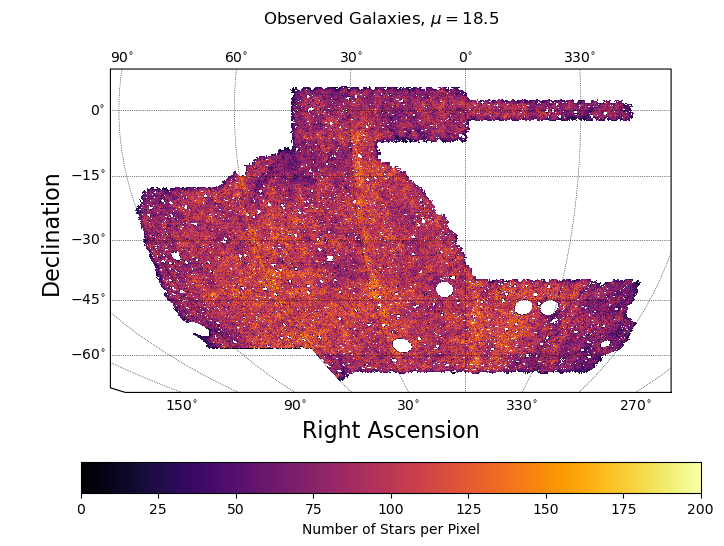

In [33]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspGala, cmap = 'inferno')
plt.clim(0, 200)
plt.colorbar(location = 'bottom', label = 'Number of Stars per Pixel')
fig.suptitle(r'Observed Galaxies, $\mu =18.5$')
plt.show()

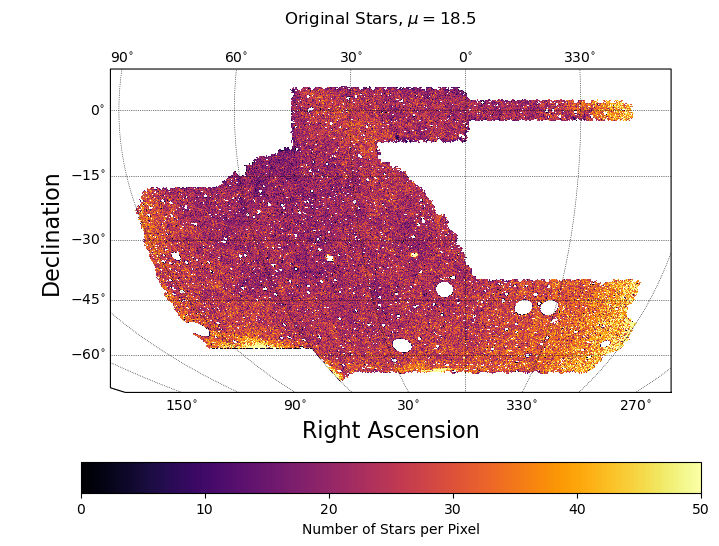

In [34]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspOrig, cmap = 'inferno')
plt.clim(0, 50)
plt.colorbar(location = 'bottom', label = 'Number of Stars per Pixel')
fig.suptitle(r'Original Stars, $\mu =18.5$')
plt.show()

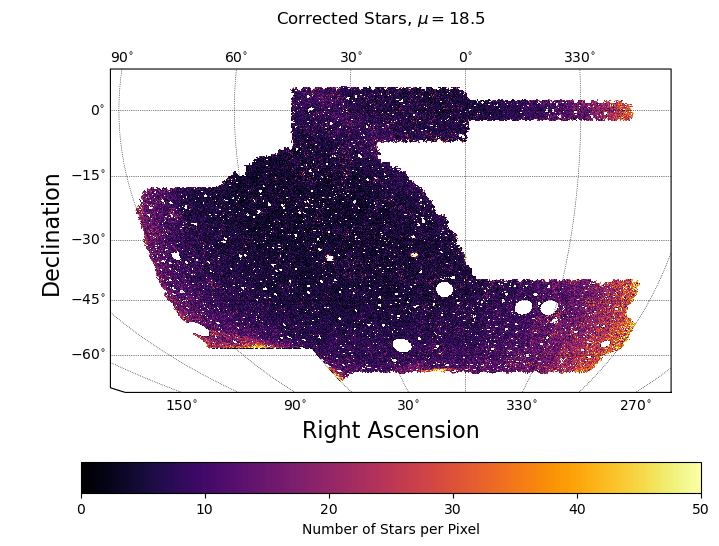

In [35]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspCorr, cmap = 'inferno')
plt.clim(0, 50)
plt.colorbar(location = 'bottom', label = 'Number of Stars per Pixel')
fig.suptitle(r'Corrected Stars, $\mu =18.5$')
plt.show()

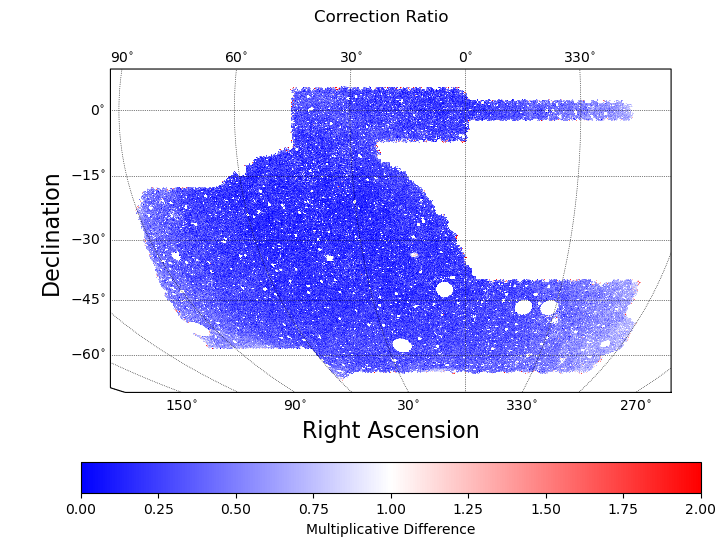

In [36]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(hspRatio, cmap = 'bwr')
plt.clim(0, 2)
plt.colorbar(location = 'bottom', label = 'Multiplicative Difference')
fig.suptitle(r'Correction Ratio')
plt.show()

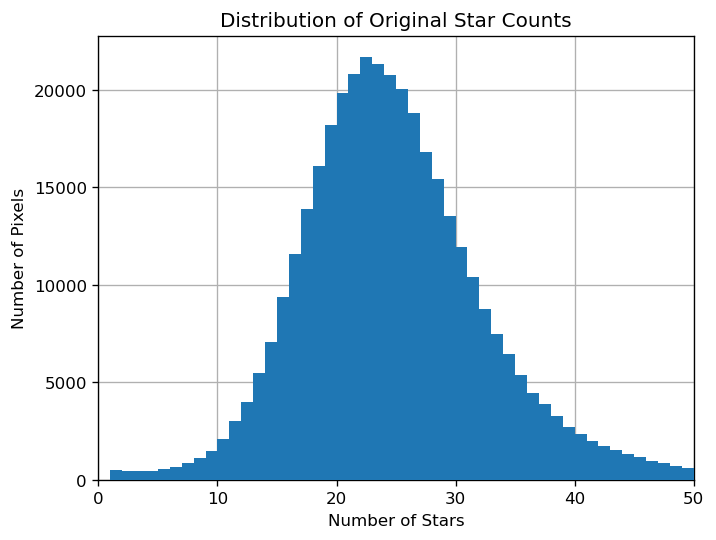

In [37]:
# By default it will clump everything beyond the last bin into it, so go one further.
plt.figure(dpi = 120)
weightOrig = plt.hist(fullOrigStar, bins = np.linspace(0, 51, 52), zorder = 3)
plt.ylabel('Number of Pixels')
plt.xlabel('Number of Stars')
plt.title('Distribution of Original Star Counts')
plt.grid(zorder = 0)
plt.xlim([0, 50])
plt.show()

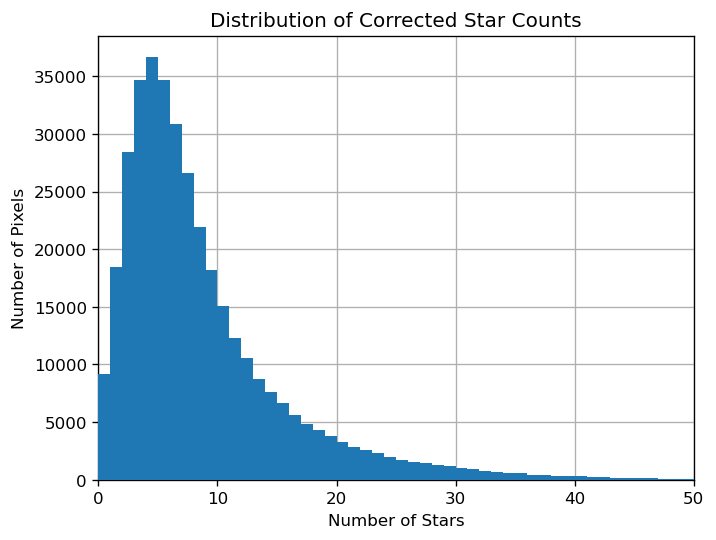

In [38]:
# By default it will clump everything beyond the last bin into it, so go one further.
plt.figure(dpi = 120)
weightOrig = plt.hist(fullCorrStar, bins = np.linspace(0, 51, 52), zorder = 3)
plt.ylabel('Number of Pixels')
plt.xlabel('Number of Stars')
plt.title('Distribution of Corrected Star Counts')
plt.grid(zorder = 0)
plt.xlim([0, 50])
plt.show()

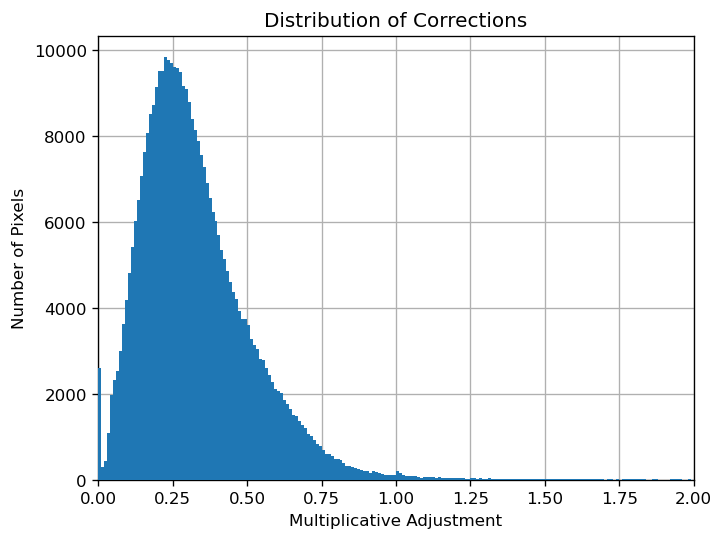

In [39]:
# By default it will clump everything beyond the last bin into it, so go one further.
plt.figure(dpi = 120)
weightOrig = plt.hist(fullRatios, bins = np.linspace(0, 2.01, 202), zorder = 3)
plt.ylabel('Number of Pixels')
plt.xlabel('Multiplicative Adjustment')
plt.title('Distribution of Corrections')
plt.grid(zorder = 0)
plt.xlim([0, 2])
plt.show()

In [40]:
correctionFile = isoConfig.correctionFile
noCorrectionFile = isoConfig.noCorrectionFile
countsFile = isoConfig.countsFile

In [41]:
correctionPix = np.where(fullRatios >= 0)[0]
correctionMult = fullRatios[correctionPix]

correctionsTable = Table()
correctionsTable['PIX'] = correctionPix
correctionsTable['CORRECTION'] = correctionMult
correctionsTable.write(correctionFile, overwrite = True)

In [42]:
noCorrectionsTable = Table()
noCorrectionsTable['PIX'] = correctionPix
noCorrectionsTable['CORRECTION'] = np.ones_like(correctionPix)
noCorrectionsTable.write(noCorrectionFile, overwrite = True)

In [43]:
originalCounts = fullOrigStar[correctionPix]
correctedCounts = fullCorrStar[correctionPix]

countsTable = Table()
countsTable['PIX'] = correctionPix
countsTable['CORRECTED'] = correctedCounts
countsTable['ORIGINAL'] = originalCounts
countsTable.write(countsFile, overwrite = True)

In [44]:
OGBinsCountFile = isoConfig.OGBinsCountFile
TSBinsCountFile = isoConfig.TSBinsCountFile
CSBinsCountFile = isoConfig.CSBinsCountFile

OGTable = Table()
OGTable['PIX'] = correctionPix
for i in range(len(obsGalaBins)):
    fullObsGalaBin = np.full(12*(res**2), hp.UNSEEN)
    fullObsGalaBin[validPix] = obsGalaBins[i]
    fullObsGalaBin[fracPix] = fullObsGalaBin[fracPix] / fracMap[fracPix]
    fullObsGalaBin[np.where(fracMap < 0.75)[0]] = hp.UNSEEN
    fullObsGalaBin[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN
    OGTable[str(i)] = fullObsGalaBin[correctionPix]
OGTable.write(OGBinsCountFile, overwrite = True)

TSTable = Table()
TSTable['PIX'] = correctionPix
for i in range(len(corrStarBins)):
    fullCorrStarBin = np.full(12*(res**2), hp.UNSEEN)
    fullCorrStarBin[validPix] = corrStarBins[i]
    fullCorrStarBin[fracPix] = fullCorrStarBin[fracPix] / fracMap[fracPix]
    fullCorrStarBin[np.where(fracMap < 0.75)[0]] = hp.UNSEEN
    fullCorrStarBin[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN
    TSTable[str(i)] = fullCorrStarBin[correctionPix]
TSTable.write(TSBinsCountFile, overwrite = True)

CSTable = Table()
CSTable['PIX'] = correctionPix
for i in range(len(claStar)):
    fullClaStarBin = np.full(12*(res**2), hp.UNSEEN)
    fullClaStarBin[validPix] = claStar[i]
    fullClaStarBin[fracPix] = fullClaStarBin[fracPix] / fracMap[fracPix]
    fullClaStarBin[np.where(fracMap < 0.75)[0]] = hp.UNSEEN
    fullClaStarBin[np.where(fullOrigStar <= 0)[0]] = hp.UNSEEN
    CSTable[str(i)] = fullClaStarBin[correctionPix]
CSTable.write(CSBinsCountFile, overwrite = True)

In [45]:
# [objRA, objDEC] = [342.95, -58.58]
# # [objRA, objDEC] = [343, -59]

In [46]:
# objPIX = hp.ang2pix(res, objRA, objDEC, lonlat = True, nest = True)
# objPIX = np.random.choice(np.where(fullOrigStar > 0)[0])

In [47]:
# print(fullOrigStar[objPIX])
# print(fullCorrStar[objPIX])
# print(fullRatios[objPIX])

In [48]:
# np.average(fullRatios[np.where(fullOrigStar > 0)[0]])